In [15]:
import torch
from torch_snippets import *

import sys
sys.path.append('..')
from unet_segmentation.engine.model_builder import UNet
from unet_segmentation.data_setup.bccd_data_setup import create_dataloaders

In [16]:
model = UNet()
state_dict = torch.load('/home/alex/projects/ml/ml_hw/hw_cv/unet_segmentation/models/bccd_segm_model_2023_10_23_09_42_25.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [17]:
_, val_dl = create_dataloaders(10, '/home/alex/projects/ml/ml_hw/hw_cv/bccd-dataset/', device='cpu')

In [18]:
im, mask = next(iter(val_dl))
_mask = model(im)

In [19]:
_, _mask = torch.max(_mask, dim=1)

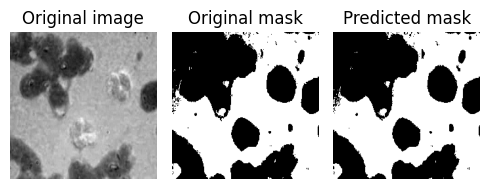

In [20]:
subplots([im[0].permute(1,2,0).detach().cpu()[:,:,0], mask.permute(1,2,0).detach().cpu()[:,:,0], \
          _mask.permute(1,2,0).detach().cpu()[:,:,0]],nc=3,titles=['Original image','Original mask', \
          'Predicted mask'])